# Computing Heterogenous Agent Jacobians in HARK

By William Du

This notebook illustrates how to compute Heterogenous Agent Jacobian matrices in HARK.

These matrices are a fundamental building building block to solving Heterogenous Agent New Keynesian Models with the sequence space jacobian methodology. For more information, see [Auclert, Rognlie, Bardoszy, and Straub (2021)](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA17434)

For the IndShockConsumerType, Jacobians of Consumption and Saving can be computed with respect to the following parameters:
LivPrb, PermShkStd,TranShkStd, DiscFac,UnempPrb, Rfree, IncUnemp.

In [1]:

from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

import time
import numpy as np
import matplotlib.pyplot as plt
from copy import copy, deepcopy

## Create Agent

In [2]:
# Dictionary for Agent
Dict = {
    "aXtraMax": 1000,
    "aXtraCount": 200,
}

In [3]:

Agent = IndShockConsumerType(**Dict)

## Compute Steady State

In [4]:

start = time.time()
Agent.compute_steady_state()
print("Seconds to compute steady state", time.time() - start)

GPFRaw                 = 0.984539 


GPFNrm                 = 0.993777 


GPFAggLivPrb           = 0.964848 


Thorn = APF            = 0.994384 


PermGroFacAdj          = 1.000611 


uInvEpShkuInv          = 0.990704 


VAF                    = 0.932054 


WRPF                   = 0.213705 


DiscFacGPFNrmMax       = 0.972061 


DiscFacGPFAggLivPrbMax = 1.010600 


Seconds to compute steady state 4.539602279663086


## Compute Jacobians

Shocks possible: LivPrb, PermShkStd,TranShkStd, DiscFac,UnempPrb, Rfree, IncUnemp, DiscFac

### Shock to Standard Deviation to Permanent Income Shocks

In [5]:

start = time.time()

CJAC_Perm, AJAC_Perm = Agent.calc_jacobian("PermShkStd", 200)

print("Seconds to calculate Jacobian", time.time() - start)

200


Seconds to calculate Jacobian 3.207632303237915


#### Consumption Jacobians

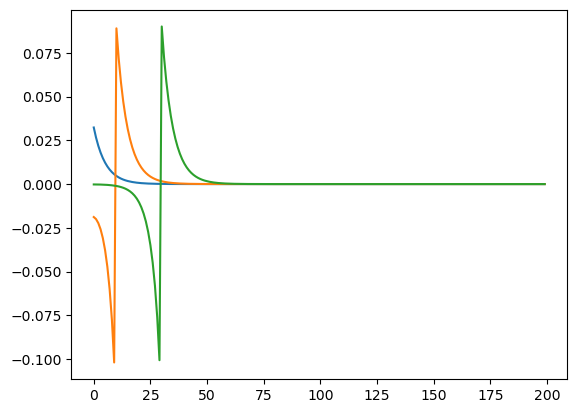

In [6]:

plt.plot(CJAC_Perm.T[0])
plt.plot(CJAC_Perm.T[10])
plt.plot(CJAC_Perm.T[30])
plt.show()

#### Asset Jacobians

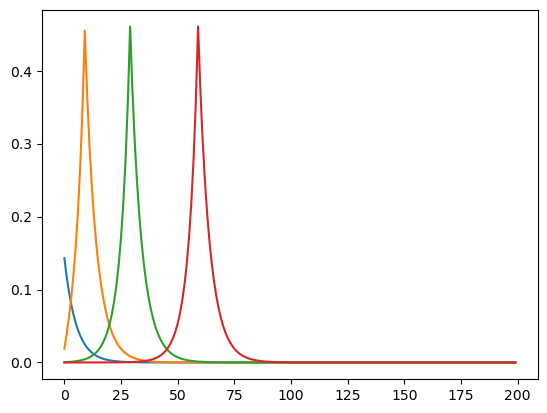

In [7]:

plt.plot(AJAC_Perm.T[0])
plt.plot(AJAC_Perm.T[10])
plt.plot(AJAC_Perm.T[30])
plt.plot(AJAC_Perm.T[60])
plt.show()

## Shock to Real Interest Rate

In [8]:
CJAC_Rfree, AJAC_Rfree = Agent.calc_jacobian("Rfree", 200)

200


#### Consumption Jacobians

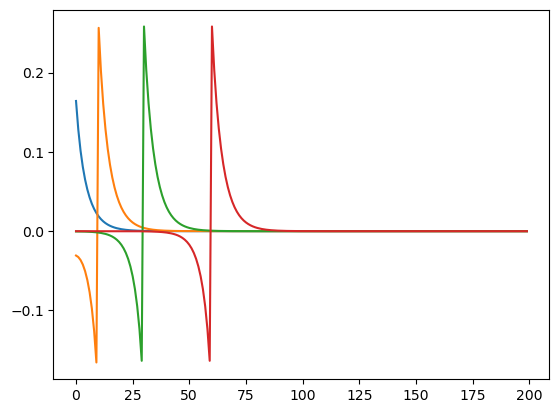

In [9]:

plt.plot(CJAC_Rfree.T[0])
plt.plot(CJAC_Rfree.T[10])
plt.plot(CJAC_Rfree.T[30])
plt.plot(CJAC_Rfree.T[60])
plt.show()

#### Asset Jacobians

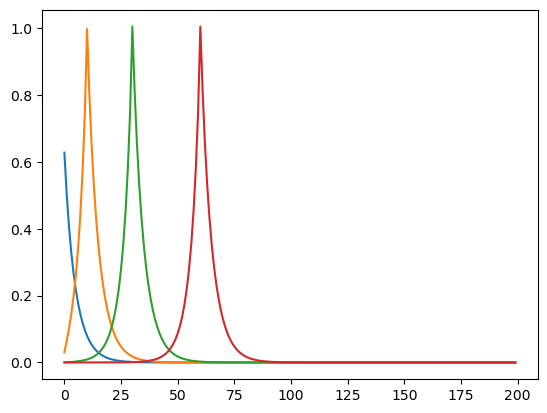

In [10]:

plt.plot(AJAC_Rfree.T[0])
plt.plot(AJAC_Rfree.T[10])
plt.plot(AJAC_Rfree.T[30])
plt.plot(AJAC_Rfree.T[60])
plt.show()

## Shock to Unemployment Probability

In [11]:
CJAC_UnempPrb, AJAC_UnempPrb = Agent.calc_jacobian("UnempPrb", 200)

200


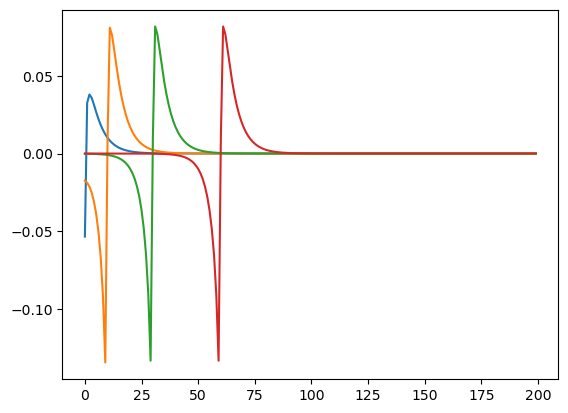

In [12]:
plt.plot(CJAC_UnempPrb.T[0])
plt.plot(CJAC_UnempPrb.T[10])
plt.plot(CJAC_UnempPrb.T[30])
plt.plot(CJAC_UnempPrb.T[60])
plt.show()

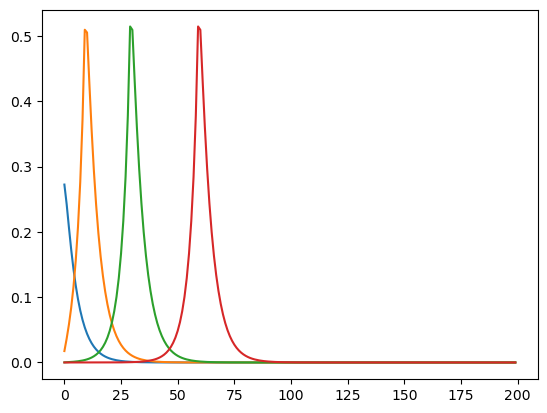

In [13]:
plt.plot(AJAC_UnempPrb.T[0])
plt.plot(AJAC_UnempPrb.T[10])
plt.plot(AJAC_UnempPrb.T[30])
plt.plot(AJAC_UnempPrb.T[60])
plt.show()

## Shock to Discount Factor

In [14]:
CJAC_DiscFac, AJAC_DiscFac = Agent.calc_jacobian("DiscFac", 200)

200


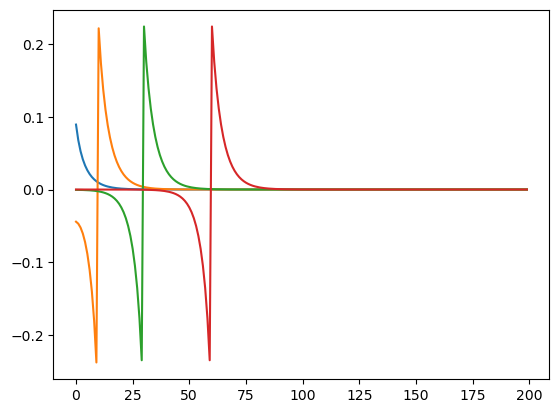

In [15]:
plt.plot(CJAC_DiscFac.T[0])
plt.plot(CJAC_DiscFac.T[10])
plt.plot(CJAC_DiscFac.T[30])
plt.plot(CJAC_DiscFac.T[60])
plt.show()

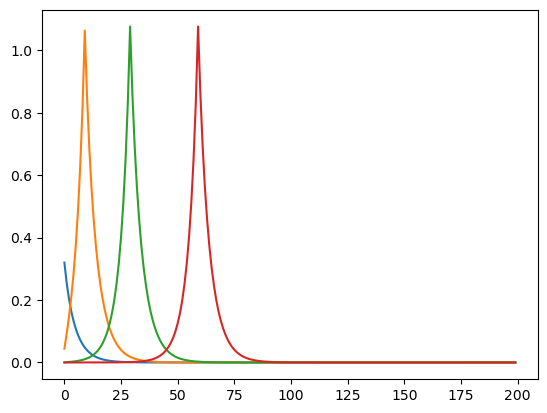

In [16]:
plt.plot(AJAC_DiscFac.T[0])
plt.plot(AJAC_DiscFac.T[10])
plt.plot(AJAC_DiscFac.T[30])
plt.plot(AJAC_DiscFac.T[60])
plt.show()